In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

/home/yoo/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
df = pd.read_clipboard()
print(df.shape)

print(df.isnull().sum())
df.head(10)

(10000, 10)
Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB
None


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [26]:
N = df.shape[0]
d = len(df.columns)
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0, d): # i = index
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        else:
            pass
    
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward += reward

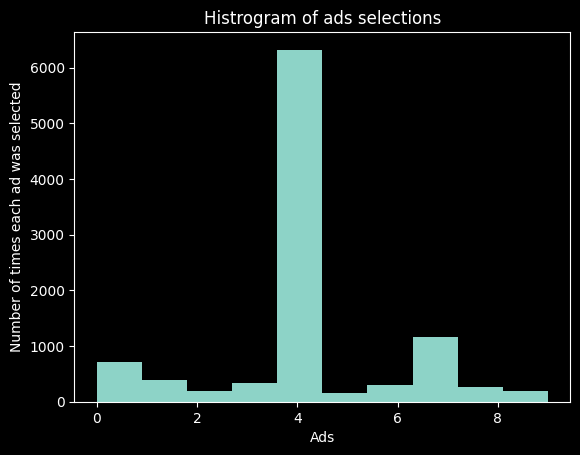

In [27]:
plt.hist(ads_selected)
plt.title("Histrogram of ads selections")
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [ ]:
# rounds(=N)에 따라, 최적의 ad가 변동